<a href="https://colab.research.google.com/github/PaolaSantiago00/Predict-student-performance-ML/blob/main/finalProject_studentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict student performance applying Machine Learning

📋 Elaborado por: Kayley H., Paola Santiago y Stephanie Ruiz Díaz

🔗 [Predict-student-performance-ML](https://github.com/PaolaSantiago00/Predict-student-performance-ML)

📚 **Referencias**


---
1.   P. Cortez, A. M. G. Silva. 2008 *Student Performance*. Recuperado de https://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf


##**Objetivos**

______________

Basándonos en el estudio realizado por Cortez y Silva (2008), buscaremos dar resolución a las preguntas "¿Es posible predecir el desempeño de un estudiante?", "¿Cuáles son los principales factores que afectan el rendimiento estudiantil?", esto aplicando técnicas de Machine Learning, especificamente de regresión lineal.

El propósito final es poder predecir si el estudiante tendrá exito en su curso (con enfoque a las materias de matemáticas), así como identificar las principales variables que derivan en el éxito/fracaso educacional.

##**Datasets**


---

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

Parametros que influyen en el estudio del dataset.

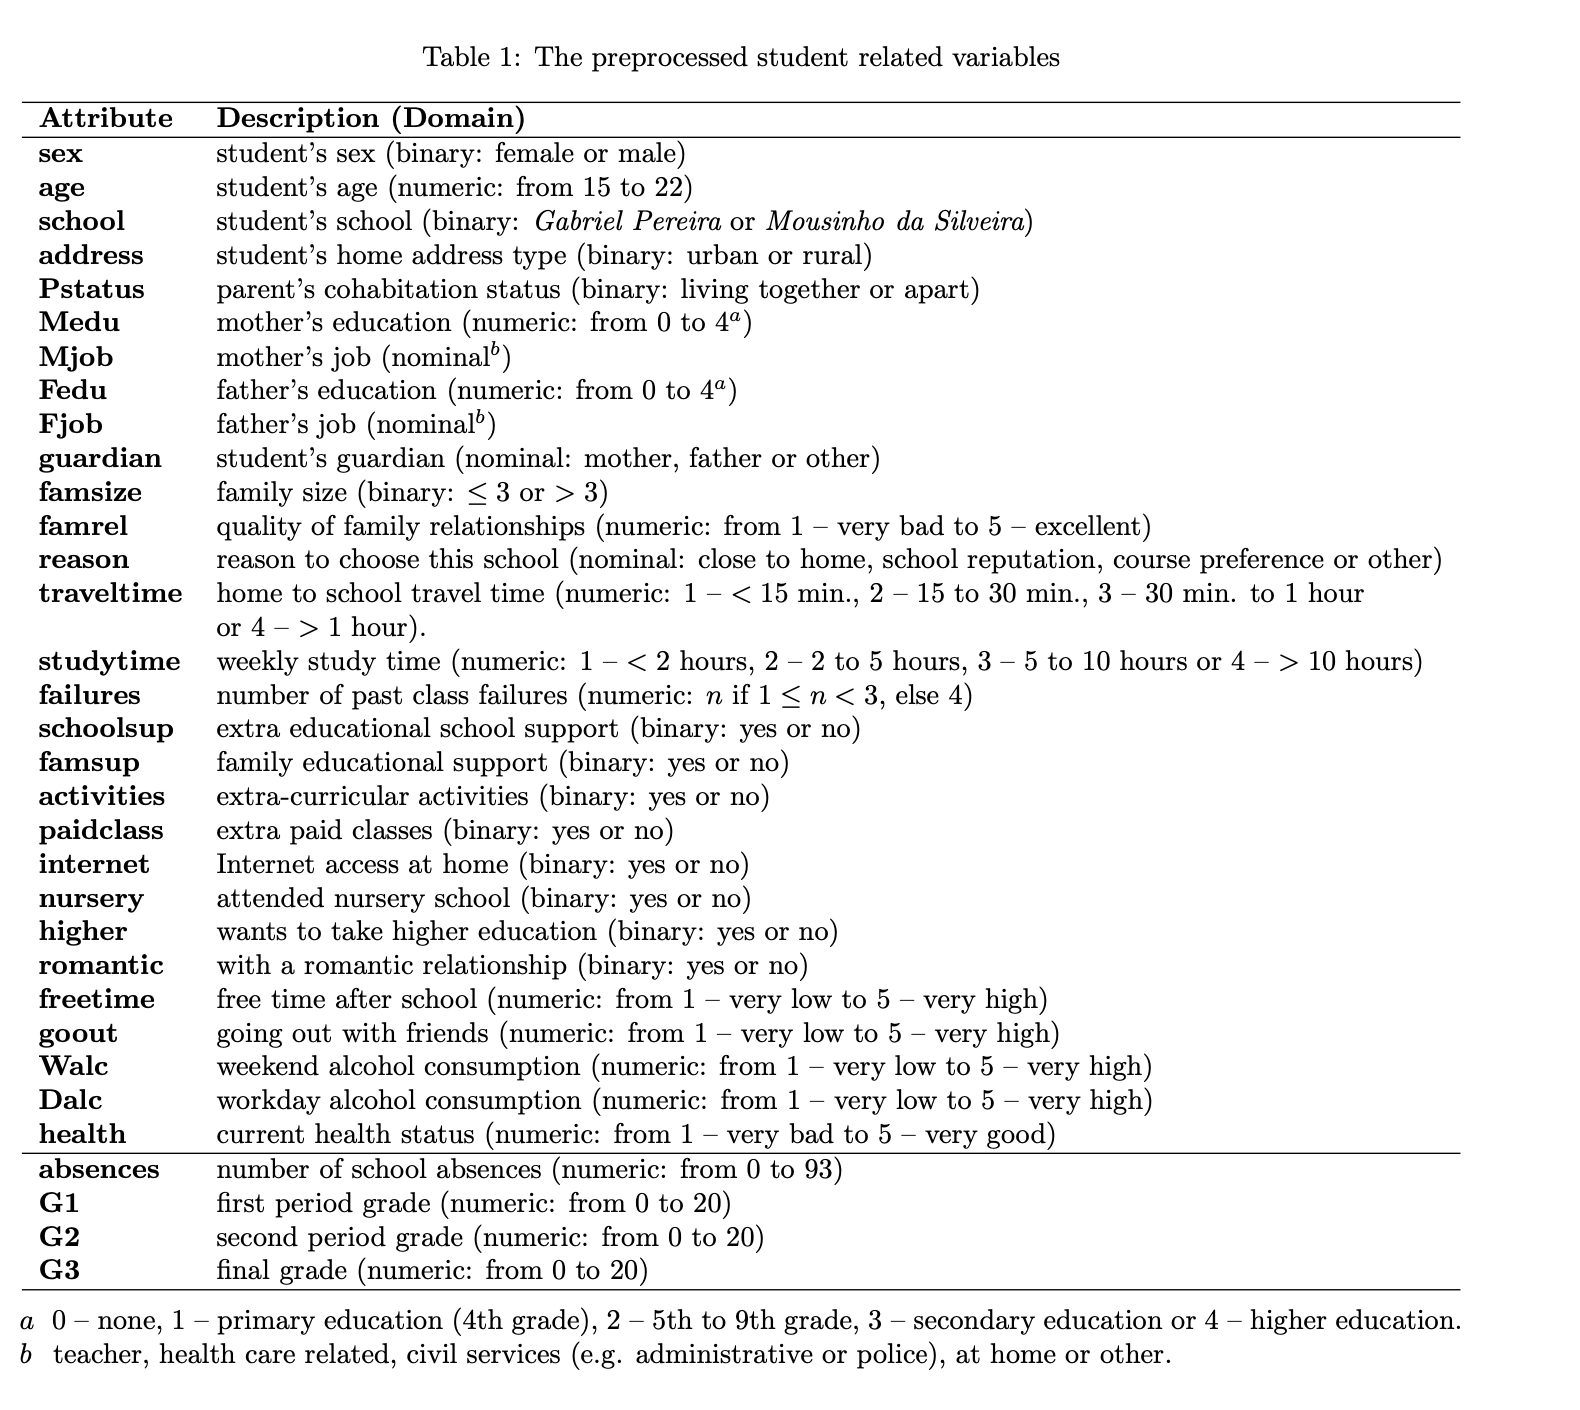

**Dataset "Matemáticas"**

In [ ]:
# Abrir archivo con formato csv formato de punto y coma

url = 'https://raw.githubusercontent.com/PaolaSantiago00/Predict-student-performance-ML/main/student-mat.csv'
df_matematicas = pd.read_csv(url, sep=';')
df_matematicas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Se procede a sacar el promedio de cada "grado" entre ellos.

In [ ]:
# promedio de columnas

def df_matematicas_prom(gx,gy,nombre_columna):

  df_matematicas[nombre_columna] = (df_matematicas[gx] + df_matematicas[gy]) / 2

df_matematicas_prom("G1","G2","promedio_g1_g2")
df_matematicas_prom("G2","G3","promedio_g2_g3")
df_matematicas_prom("G1","G3","promedio_g1_g3")
df_matematicas.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,promedio_g1_g2,promedio_g2_g3,promedio_g1_g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.5,6.0,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.0,5.5,5.5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,7.5,9.0,8.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.5,14.5,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,8.0,10.0,8.0


In [ ]:
#Investigamos con cuantas filas y columnas cuenta el dataset "Matemáticas"
num_filas_np, num_columnas_np = df_matematicas.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 395
Número de columnas: 36


In [ ]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in df_matematicas.columns:
    print(nombre_columna)

Nombres de las columnas:
school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3
promedio_g1_g2
promedio_g2_g3
promedio_g1_g3


#**Desarrollo proyecto**

---

##**Análisis de variables**

In [ ]:
#Revisión de datos para asegurarnos que no haya nans en el DF de matemáticas
df_matematicas.isna().any().any()

False

Text(0.5, 0.98, 'Calificaciones de los tres parciales de Matemáticas')

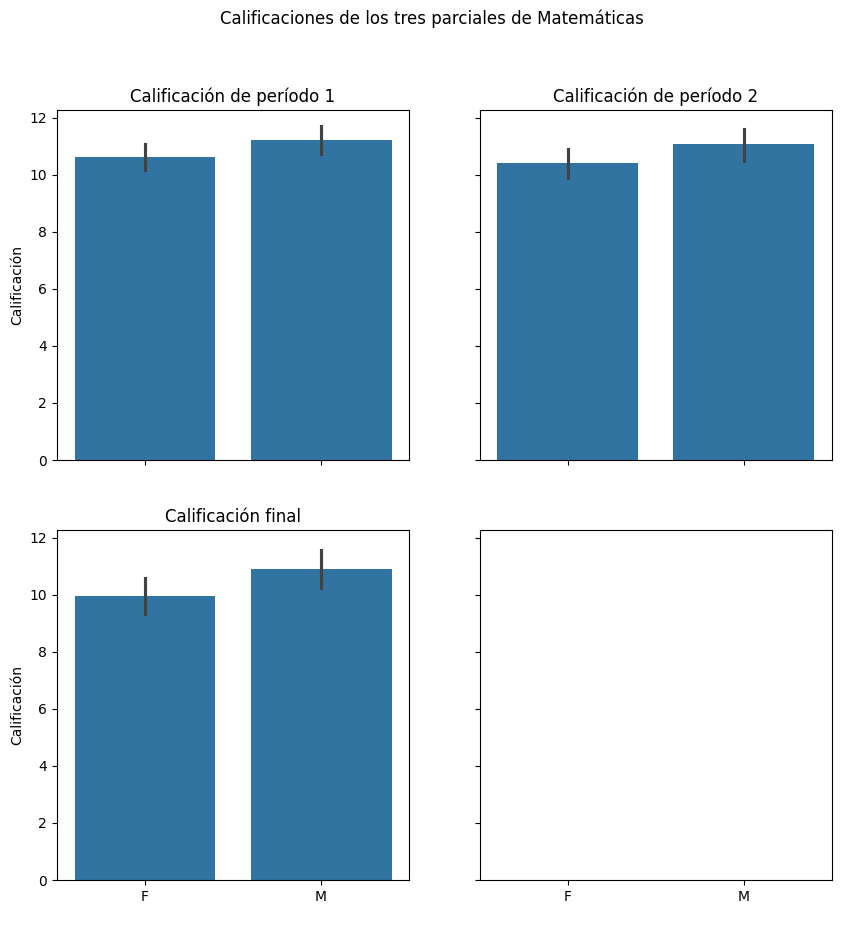

In [ ]:
#Barplot de G1, G2, y G3 [Matemáticas] en contraste al sexo del estudiante

import matplotlib.pyplot as plt

fig, axes = plt.subplots (2, 2, figsize=(10,10), sharex=True, sharey=True)
sns.barplot(y=df_matematicas['G1'], x=df_matematicas['sex'], ax=axes [0] [0])
sns.barplot(y=df_matematicas['G2'], x=df_matematicas['sex'], ax=axes [0] [1])
sns.barplot(y=df_matematicas['G3'], x=df_matematicas['sex'], ax=axes [1] [0])

axes[0] [0].set(xlabel=" ", ylabel="Calificación", title= "Calificación de período 1")
axes[0] [1].set(xlabel=" ", ylabel="Calificación", title= "Calificación de período 2")
axes[1] [0].set(xlabel=" ", ylabel="Calificación", title= "Calificación final")
fig.suptitle("Calificaciones de los tres parciales de Matemáticas")

In [ ]:
#Se transforma en valores binarios las columnas "sex, Pstatus", para que se puedan analizar
def transf_binario_mat (nombre_columna):
    n = 0
    for x in df_matematicas[nombre_columna]:
      if (x == "F" or x=="yes" or x=="T"):
        df_matematicas.at[n,nombre_columna]=int(1)
      else:
        df_matematicas.at[n,nombre_columna]=int(0)
      n+=1

#Transformamos sexo en binarios, donde será 1 para mujeres y 0 para hombres
transf_binario_mat('sex')
transf_binario_mat('Pstatus')
df_matematicas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,promedio_g1_g2,promedio_g2_g3,promedio_g1_g3
0,GP,1,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.5,6.0,5.5
1,GP,1,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.0,5.5,5.5
2,GP,1,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,7.5,9.0,8.5
3,GP,1,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.5,14.5,15.0
4,GP,1,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.0,10.0,8.0


In [ ]:
#Transformamos internet en binarios, donde será el valor: 1 = Sí hay acceso de internet en casa y 0= Sin acceso de internet
transf_binario_mat('internet')

In [ ]:
#Buscamos las profesiones de los padres
df_matematicas["Fjob"].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [ ]:
#Buscamos las profesiones de las madres
df_matematicas["Mjob"].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [ ]:
#función para transformar los trabajos a númericos
def transf_jobs_mat (nombre_columna):
    n = 0
    for x in df_matematicas[nombre_columna]:
      if (x == "other"):
        df_matematicas.at[n,nombre_columna]=int(0)
      elif (x == "services"):
        df_matematicas.at[n,nombre_columna]=int(1)
      elif (x == "at_home"):
        df_matematicas.at[n,nombre_columna]=int(2)
      elif (x == "teacher"):
        df_matematicas.at[n,nombre_columna]=int(3)
      else:
        df_matematicas.at[n,nombre_columna]=int(4)
      n+=1

In [ ]:
transf_jobs_mat("Fjob")
transf_jobs_mat("Mjob")

In [ ]:
#Promedio general de los parciales G1, G2, G3
df_matematicas['Promedio'] = (df_matematicas['G1'] + df_matematicas['G2'] + df_matematicas['G3']) / 3

In [ ]:
#Seleccionamos nombre de columnas para el análisis de correlación
columnas_seleccionadas = [
    "age",
    "absences",
    "sex",
    "famrel",
    "internet","studytime",
    "Mjob","Fjob",
    "Medu","Fedu",
    "G1", "G2", "G3",
    "Promedio"]

In [ ]:
#Se crea el df_mate_variables
df_mate_variables = df_matematicas[columnas_seleccionadas]
df_mate_variables

,age,absences,sex,famrel,internet,studytime,Mjob,Fjob,Medu,Fedu,G1,G2,G3,Promedio
0,18,6,1,4,0,2,2,3,4,4,5,6,6,5.666667
1,17,4,1,5,1,2,2,0,1,1,5,5,6,5.333333
2,15,10,1,4,1,2,2,0,1,1,7,8,10,8.333333
3,15,2,1,3,1,3,4,1,4,2,15,14,15,14.666667
4,16,4,1,4,0,2,0,0,3,3,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,11,0,5,0,2,1,1,2,2,9,9,9,9.000000
391,17,3,0,2,1,1,1,1,3,1,14,16,16,15.333333
392,21,3,0,5,0,1,0,0,1,1,10,8,7,8.333333
393,18,0,0,4,1,1,1,0,3,2,11,12,10,11.000000


In [ ]:
df_mate_variables['sex'] = df_mate_variables['sex'].astype(int)
df_mate_variables['internet'] = df_mate_variables['internet'].astype(int)
df_mate_variables['Mjob'] = df_mate_variables['Mjob'].astype(int)
df_mate_variables['Fjob'] = df_mate_variables['Fjob'].astype(int)

<ipython-input-17-94a7217677ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mate_variables['sex'] = df_mate_variables['sex'].astype(int)
<ipython-input-17-94a7217677ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mate_variables['internet'] = df_mate_variables['internet'].astype(int)
<ipython-input-17-94a7217677ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

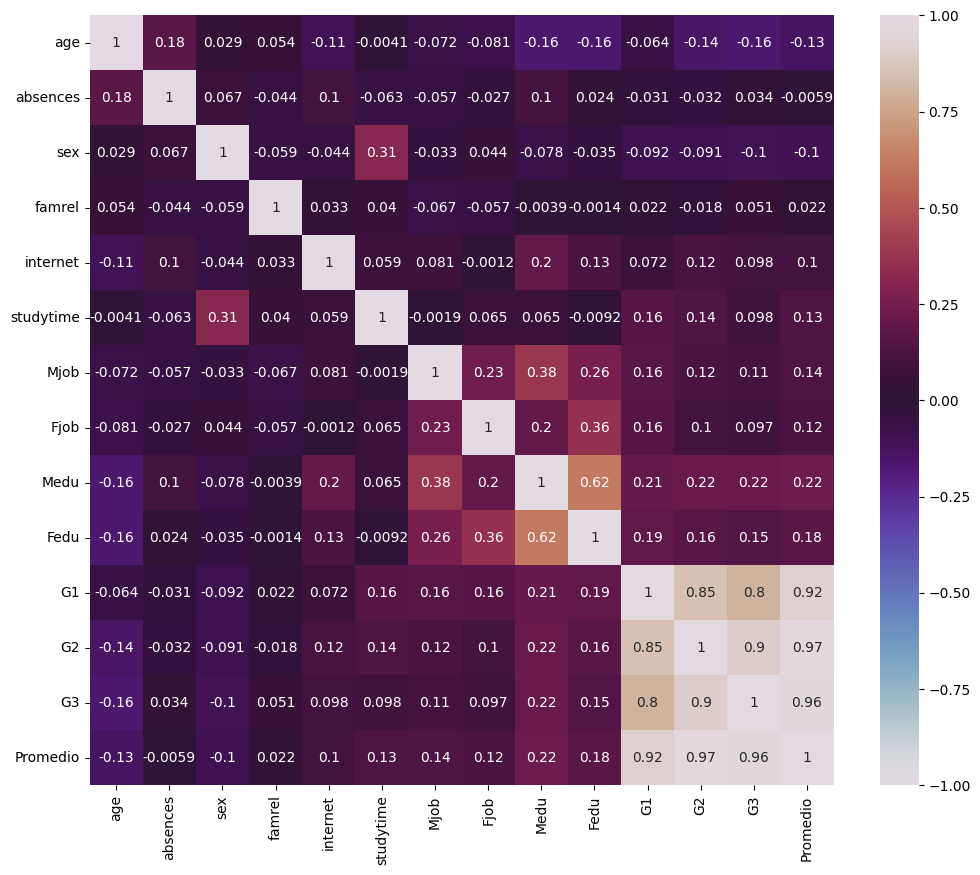

In [ ]:
#Heatmap de correlación de las variables
plt.figure(figsize=(12,10))
ax= sns.heatmap(df_mate_variables.corr(),vmin=-1,vmax=1,annot=True, cmap= "twilight")

Eliminamos aquellas variables que hemos identificado que no tienen una gran relevancia en el estudio, deshaciendonos de las variables de edad, ausencias, sexo y relación familiar.

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['age', 'absences', 'sex', 'famrel']

# Eliminar las columnas si existen
for columna in columnas_a_eliminar:
    if columna in df_mate_variables.columns:
        df_mate_variables = df_mate_variables.drop(columna, axis=1)
    else:
        print(f"La columna '{columna}' no existe en el DataFrame.")

# Verificar el DataFrame resultante
print(df_mate_variables.head())

   internet  studytime  Mjob  Fjob  Medu  Fedu  G1  G2  G3   Promedio
0         0          2     2     3     4     4   5   6   6   5.666667
1         1          2     2     0     1     1   5   5   6   5.333333
2         1          2     2     0     1     1   7   8  10   8.333333
3         1          3     4     1     4     2  15  14  15  14.666667
4         0          2     0     0     3     3   6  10  10   8.666667


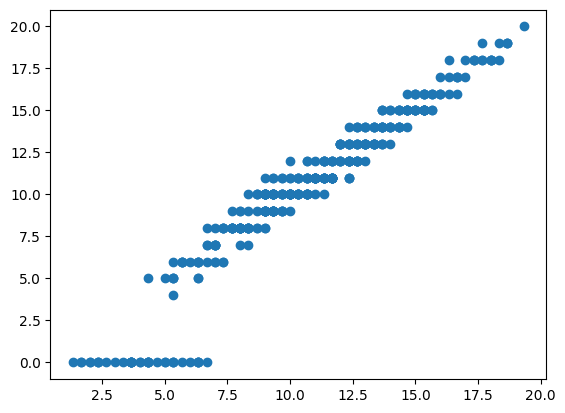

In [ ]:
# Gráfico
fig, ax = plt.subplots()
ax.scatter(x = df_mate_variables['Promedio'], y= df_mate_variables['G3'])
# plt.show()

##**Análisis de regresión**

###**Regresión líneal**

Buscando relacionar nuestras variables dependientes con las independientes, aplicaremos regresión lineal.

**Errores y ajustes de pesos sinápticos**

Seleccionamos nuestras variables para **X**, dejando G3 (que queremos predecir) en **y**


In [ ]:
#Se manda a llamar el dataset
df_mate_variables.head()

,internet,studytime,Mjob,Fjob,Medu,Fedu,G1,G2,G3,Promedio
0,0,2,2,3,4,4,5,6,6,5.666667
1,1,2,2,0,1,1,5,5,6,5.333333
2,1,2,2,0,1,1,7,8,10,8.333333
3,1,3,4,1,4,2,15,14,15,14.666667
4,0,2,0,0,3,3,6,10,10,8.666667


In [ ]:
X = df_mate_variables[["internet","studytime","Mjob",
                       "Fjob","Medu","Fedu","G2", "G3"]]
y = df_matematicas['Promedio']

Hacemos la división de nuestros datos en Train y Test, de manera que entrenemos un regresor lineal buscando la mejor predicción de G3.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.50, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(197, 8)
(198, 8)
(197,)
(198,)


**Entrenamiento y pruebas**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.3055851501664099
Pruebas: MSE =0.3300012341529524


**Predicciones**

Mostramos las predicciones en contraste de los valores reales para ver el funcionamiento de nuestro entrenamiento



In [ ]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,17.666667,17.232026,0.434641
1,5.666667,5.330664,0.336003
2,13.333333,13.230713,0.102620
3,12.666667,12.858535,-0.191868
4,5.333333,5.172354,0.160979
5,10.333333,10.620157,-0.286824
6,8.666667,9.078890,-0.412224
7,11.666667,11.013492,0.653175
8,12.666667,11.850344,0.816323
9,11.666667,11.550745,0.115922


Nos damos cuenta que la diferencia entre el valor real y el valor que sacamos de predicciones, la diferencia es mínima.

###**Regresión polinomial**


---
Buscando un modelo que se ajuste de mejor manera a nuestros datos disminuyendo el error en las prediciones, aplicaremos regresión polinomial de grado 2, 3 y 4.

**Polinomio de grado 2**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.17645652266455636
Pruebas: MSE =0.29684906916295134


,valor_real,prediccion,diferencia
0,17.666667,18.204880,-0.538213
1,5.666667,5.319077,0.347590
2,13.333333,13.208832,0.124502
3,12.666667,12.887970,-0.221303
4,5.333333,4.888245,0.445089
5,10.333333,10.467453,-0.134120
6,8.666667,9.022018,-0.355352
7,11.666667,10.795853,0.870814
8,12.666667,11.475937,1.190730
9,11.666667,11.475632,0.191035


**Polinomio de grado 3**

In [ ]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.04858609922853625
Pruebas: MSE =9.733654745012016


,valor_real,prediccion,diferencia
0,17.666667,22.072792,-4.406125
1,5.666667,6.854078,-1.187412
2,13.333333,13.332149,0.001185
3,12.666667,13.222445,-0.555779
4,5.333333,9.015624,-3.682291
5,10.333333,10.371337,-0.038004
6,8.666667,8.703291,-0.036624
7,11.666667,10.986896,0.679771
8,12.666667,11.410522,1.256145
9,11.666667,12.138020,-0.471353


In [ ]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=4)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =4.8766532319399434e-24
Pruebas: MSE =56.59357700809721


,valor_real,prediccion,diferencia
0,17.666667,16.186781,1.479885
1,5.666667,13.701319,-8.034652
2,13.333333,15.111118,-1.777785
3,12.666667,12.895283,-0.228616
4,5.333333,9.291542,-3.958209
5,10.333333,10.105885,0.227448
6,8.666667,11.403164,-2.736497
7,11.666667,11.775129,-0.108463
8,12.666667,13.437776,-0.771110
9,11.666667,9.315568,2.351098


##**Conclusión**##
________________

Si bien fue un proyecto el cual inicialmente se tenía pensado trabajar implementando algoritmos de clasificación después de realizar un análisis de las variables que se estudiarían y la naturaleza del problema (determinar si el estudiante aprobaría la matería o no), se determinó implementar algoritmos de regresión (lineal y polinomiales).

Después de eso, durante el estudio del dataset se trabajó con las variables de *internet, studytime, Mjob, Fjob, Medu, Fedu, G2, G3*, las cuales se decidieron aplicar en el proyecto después de realizar una correlación (mostrandose gráficamente como Heatmap).

Habiendo probado con diferentes modelos, optamos por definir el modelo de "Regresión Lineal" como el más acertado, debido a que el margen de error entre los valores reales y valores que se predicen son mínimos.

De esta manera, podemos dar respuesta a las preguntas planteadas como objetivos (¿Es posible predecir el desempeño de un estudiante?, ¿Cuáles son los principales factores que afectan el rendimiento estudiantil?), resultando en que sí es posible predecir el desempeño de un estudiante, definiendo como principales factores las variables mencionadas anteriormente.